# DSM 1121
>主題: 【經典數據分析1: 鳶尾花(iris)資料集】<br>
#K鄰近分類演算法(KNN)與資料視覺化

本學期DSM主題預告: 鐵達尼號生存預測(11/28)、波士頓房價預測(12/5)、藥物與酒精作用資料集(12/12)

## 1. 資料蒐集(獲取)

### 1.1 Kaggle 資料集
Kaggle是一個數據建模和數據分析競賽平台，同時也是數據愛好者、機器學習工程師和科學家交流和學習的社群，提供了大量高品質的公開數據集，涵蓋廣泛的主題許多數據集供用戶下載。

https://www.kaggle.com/

### 1.2 要如何取得 Kaggle 上的資料集呢?

1. 開啟 Kaggle 資料集上的 Notebook，將該 dataset 用 read_csv() 讀取出來，讀取方式輸入以下語法，接著就可以開始對 Dataframe (sales)進行資料分析。
```python
import pandas as pd
sales = pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv')
```
2. 從 Kaggle API 下載資料集，首先要先安裝 Kaggle 套件，接著輸入指令，即可下載資料集。(適用於colab)

3. 下載csv檔案到本地端，首先要先安裝 Kaggle 套件，接著輸入以下語法，即可下載資料集。


### 1.3 Kaggle 資料集的對於初學數據科學的一大優勢: 乾淨、高品質
Kaggle 的數據集通常經過標準化處理，資料乾淨且結構明確：
- 缺失值少或已處理過。
- 資料格式清晰（如 CSV、JSON、圖像文件）。
- 附有清楚的數據描述與元數據（Metadata），便於理解。


Source:
- https://nancysw.medium.com/%E5%85%A9%E7%A8%AE%E5%8F%96%E7%94%A8-kaggle-%E8%B3%87%E6%96%99%E9%9B%86%E7%9A%84%E6%96%B9%E6%B3%95-5944a1bcebf3
- https://ithelp.ithome.com.tw/articles/10306093
- https://ithelp.ithome.com.tw/articles/10219848



### a) iris資料集的資訊吧

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
!pip install kaggle kagglehub

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     --------- ---------------------------- 20.5/82.7 kB 320.0 kB/s eta 0:00:01
     -------------------------------------  81.9/82.7 kB 919.0 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 770.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for python-slugify from https://files.pythonhosted.org/packages/a4/62/02da182e544a51a5c3ccf4b03ab79df279f9c60c5e82d5e8bec7ca26ac11/python_slugify-8.0.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for text-unidecode>=1.3 from https://files.pythonhosted.org/packages/a6/a5/c0b6468d3824fe3fde30dbb5e1f687b291608f9473681bbf7dabbf5a87d7/text_unidecode-1.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
   ---------------------------------------- 78.2/78.2 kB 4.2 MB/s eta 0:00:00
 


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: C:\Users\SHI\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


方法一: 透過 Kaggle API 下載資料集

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")
print("Path to dataset files:", path)#

# Load the dataset
iris = load_iris()

#呈現資料集
print(iris.data)



Path to dataset files: C:\Users\SHI\.cache\kagglehub\datasets\uciml\iris\versions\2
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.

方法2: 讀取本地端的 iris.csv 檔案


In [ ]:
#讀取本地端資料集
import pandas as pd
iris_data = pd.read_csv("C:\\Users\\SHI\\Downloads\\Iris.csv")
print(iris_data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

## 1.4 補充知識點!

在使用 Windows 系統進行 Python 路徑操作時，確保路徑正確且符合格式非常重要。以下將重點說明 **相對路徑** 與 **絕對路徑** 的差異，以及如何正確處理路徑（特別是雙斜線 `\\` 格式）：

---

### **1. 相對路徑與絕對路徑的區別**

#### **相對路徑**
- **定義**：相對於目前執行檔案所在目錄的路徑。
- **優勢**：更靈活，適合在不同環境中運行程式。
- **例子**：
  - `./data`：指執行程式時的當前目錄下的 `data` 資料夾。
  - `../data`：指當前目錄的上一層目錄中的 `data` 資料夾。

#### **絕對路徑**
- **定義**：從根目錄開始的完整路徑。
- **優勢**：不依賴程式執行的位置，適合靜態路徑。
- **例子**：
  - `C:\\Users\\SHI\\Documents\\data`
  - `D:\\Projects\\Python\\data`


我自己會將路徑理解成你要找一個學生的過程，而學生是你要的檔案，資料夾則是班級的概念。

- **檔案（學生）**：檔案就像一個個學生，每個都有自己的名字（檔案名稱）和特徵（檔案類型，比如 `.txt`, `.jpg`）。  
  **舉例**：學生小明的檔案可能叫 `小明.txt`，或者是 `小明.jpg`。

- **資料夾（班級）**：資料夾就是一個班級，裡面不僅有學生（檔案），也可能有其他班級（子資料夾）。  
  **舉例**：班級一（資料夾）裡面可能有 `小明.txt`，還有隔壁班的資料夾 `班級二`。

- **路徑**：路徑就像找某位學生的「指引地圖」。你需要知道他在哪棟教室、哪個班級，才能準確找到他。  
  **舉例**：如果你要找「小明」，路徑可能是 `C:\學校\大樓A\班級1\小明.txt`。


- **絕對路徑（全校找人）**  
  **什麼意思**：這是最完整的指引，從學校正門開始，一路告訴你該去哪棟大樓、幾樓、哪個班級。  
  **舉例**：`C:\學校\大樓A\班級1\小明.txt` 就像在說：「從學校大門進來，走到 A 大樓，進到班級 1，找到小明。」

- **相對路徑（班級裡找人）**  
  **什麼意思**：當你已經在班級裡的時候，直接用簡短的路徑來描述目標。  
  **舉例**：`./小明.txt` 就是在說：「小明就在這班裡。」  
  如果你要找隔壁班的學生，可能是 `../班級2/小華.txt`，這就像說：「去隔壁班找小華。」

**小結**：  
**絕對路徑** 是一步步完整的指引，適合新來的同學或不熟悉校區的人。  
**相對路徑** 就是內行人才懂的簡單描述，適合你已經知道自己在哪。

---

### **2. Windows 中的路徑處理注意事項**

#### **(1) 使用雙斜線 `\\`**
Windows 系統的路徑使用反斜線（`\`），但在 Python 中需要用雙斜線（`\\`）來避免被解釋為轉義字符。

**例子：**

```python
path = "C:\\Users\\SHI\\Documents\\data"
```

#### **(2) 使用原始字串 `r'...'`**
在 Python 中可以使用原始字串標記 `r'...'`，告訴解釋器不要將反斜線視為轉義字符。

**例子：**

```python
path = r"C:\Users\SHI\Documents\data"
```

#### **(3) 使用 `os.path` 或 `pathlib` 處理路徑**
為了避免手動處理不同系統的路徑格式，建議使用 Python 的內建模組 `os` 或 `pathlib` 進行跨平台路徑操作。

**例子：**

```python
import os

# 拼接路徑
base_dir = "C:\\Users\\SHI"
data_dir = "Documents\\data"
full_path = os.path.join(base_dir, data_dir)
print(full_path)  # C:\Users\SHI\Documents\data
```

---

### **3. Python 路徑操作技巧**

#### **(1) 檢查檔案或資料夾是否存在**
在操作路徑之前，先確認路徑是否正確，避免程式出錯。

```python
import os

path = r"C:\Users\SHI\Documents\data"
if os.path.exists(path):
    print("路徑存在")
else:
    print("路徑不存在")
```

#### **(2) 獲取當前目錄或腳本所在目錄**
- **當前目錄**：
  ```python
  current_dir = os.getcwd()
  print(current_dir)  # 當前工作目錄
  ```
- **腳本所在目錄**：
  ```python
  script_dir = os.path.dirname(os.path.abspath(__file__))
  print(script_dir)
  ```

#### **(3) 切換工作目錄**
使用 `os.chdir()` 可以臨時改變工作目錄，方便操作相對路徑。

```python
import os

os.chdir(r"C:\Users\SHI\Documents")
print(os.getcwd())  # C:\Users\SHI\Documents
```
#### 推薦時間
想要更了解os模組，可參考
- https://www.threads.net/@lifefriend_bigcatpanda/post/DCykUhFS_pX?xmt=AQGzbNzG5PD0jcewANJsHNt1gPy__SQKybvlsFh-ECQpHg
--

## 2. 資料預處理
資料前處理（Data Preprocessing）或資料預處理，是指在進行數據分析、建立模型或機器學習之前，對原始數據進行清理、轉換和整理的過程。 資料前處理的目的是確保數據的品質和一致性，以及減少不確定性和噪音，讓數據更適合進行後續的分析和建模工作。 Sourse: https://www.nextlink.cloud/news/what-is-data-preprocessing-202308/

今天我們來檢查這筆資料並處理缺失值（包括模擬缺失值），同時分割數據集並進行標準化處理。


### 2.0 資料集的摘要
首先，我們先透過 `pandas` 套件讀取 `iris.csv` 檔案，並且將其分割成特徵和標籤，接著我們使用info()和describe()方法來檢查資料的摘要。

In [ ]:

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # 特徵
y = pd.Series(iris.target, name="target")  # 標籤

# 檢查資料摘要
print("數據摘要：")
print(X.info())  # 查看數據類型和非空值數量
print("\n數據描述：")
print(X.describe())  # 查看特徵的統計摘要

數據摘要：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

數據描述：
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000      

## 2.1 為何資料會出現缺失值呢?
根據 Designing ML System[2]中提到，缺失值的原因主要可以分為以下三種：

### 1. Missing Not at Random (MNAR)
缺失值的產生與其實際數值有關，代表資料的缺失並非隨機，而是某些因素影響。例如，問卷中收入較高的人可能會選擇不回答收入相關問題，導致這些資料的缺失與收入的實際數值有關。這種情況下，缺失值會導致偏差，分析時需要特別處理。

### 2. Missing At Random (MAR)
資料的缺失與變數本身的數值無關，但可能與其他觀察到的變數有關。例如，學生的缺席資料可能與其居住地距離學校的遠近有關，但與學生的成績無直接關係。這類缺失可以透過其他觀察到的變數進行推測與補齊。

### 3. Missing Completely At Random (MCAR)
資料的缺失完全隨機，與任何變數的值都無關。例如，在調查過程中因技術問題遺漏了一些問卷。這種缺失值較少會引入偏差，但仍可能影響分析結果，尤其是當缺失值比例較高時


source: https://medium.com/@AppliedDataScienceWeeklyNew/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%B8%B8%E8%A6%8B%E8%A7%80%E5%BF%B5-%E7%BC%BA%E5%A4%B1%E5%80%BC%E8%99%95%E7%90%86-8d62547d0c13

## 2.2 如何處理資料遺失值?
主要有兩大方法可以處理缺失值：
1. 刪除缺失值(Deletion)
2. 補齊缺失值(Imputation)

### **1. 刪除（Deletion）**
#### 方法：
- **列刪除（Deleting Rows / Listwise Deletion）**
  - 移除包含缺失值的整列數據。
- **逐對刪除（Pairwise Deletion）**
  - 僅在特定分析中排除與缺失值相關的列，但保留其他完整的資料。
- **欄刪除（Deleting Columns）**
  - 移除缺失值比例過高的整欄數據。


### **2. 插補（Imputation）**
#### **時間序列問題（Time-Series Problem）**
1. **資料無趨勢且無季節性**
   - 插補方法：均值（Mean）、中位數（Median）、眾數（Mode）、隨機樣本插補（Random Sample Imputation）。
2. **資料有趨勢但無季節性**
   - 插補方法：線性插值（Linear Interpolation）。
3. **資料有趨勢且有季節性**
   - 插補方法：季節性調整+插值（Seasonal Adjustment + Interpolation）。

#### **一般問題（General Problem）**
1. **類別型資料（Categorical）**
   - 插補方法：
     - 將缺失值作為一個類別（Make NA as a level）。
     - 多重插補（Multiple Imputation）。
     - 使用邏輯回歸（Logistic Regression）。
2. **連續型資料（Continuous）**
   - 插補方法：
     - 均值（Mean）、中位數（Median）、眾數（Mode）。
     - 多重插補（Multiple Imputation）。
     - 線性回歸（Linear Regression）。

---

### **重點整理**
1. **刪除法適合缺失值比例低且資料量充足時**。
2. **插補法需根據資料性質選擇適合的方式**：
   - 時間序列問題需考慮趨勢與季節性。
   - 一般問題中，類別型資料可將缺失值視為一個類別，而連續型資料多採用插補模型。
3. **選擇方式時需平衡數據完整性與分析結果的準確性**。


source: https://medium.com/jackys-blog/%E5%A6%82%E4%BD%95%E8%99%95%E7%90%86%E7%BC%BA%E5%A4%B1%E5%80%BC-%E4%BD%BF%E7%94%A8python-479e030a43c7

In [ ]:
# import numpy as np
# # 模擬缺失值處理（僅作為示範）
# # 隨機將一些數據設為 NaN
# np.random.seed(42)
# missing_mask = np.random.rand(*X.shape) < 0.1  # 隨機選擇 10% 的數據設為 NaN
# X_with_missing = X.copy()
# X_with_missing[missing_mask] = np.nan

# print("\n包含缺失值的數據：")
# print(X_with_missing.head())

# # 檢查缺失值
# missing_counts = X_with_missing.isnull().sum()
# print("\n缺失值數量：")
# print(missing_counts)

# # 缺失值處理：填補缺失值（使用平均值填補）
# X_cleaned = X_with_missing.fillna(X_with_missing.mean())
# print("\n填補缺失值後的數據：")
# print(X_cleaned.head())


包含缺失值的數據：
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                NaN               0.2
2                4.7               3.2                NaN               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

缺失值數量：
sepal length (cm)    23
sepal width (cm)     15
petal length (cm)    18
petal width (cm)     16
dtype: int64

填補缺失值後的數據：
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5           1.400000               0.2
1                4.9               3.0           3.737879               0.2
2                4.7               3.2           3.737879               0.2
3                4.6               3.1           1.500000               0.2
4                5.0    

In [ ]:
# 2. 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. 模型訓練-KNN(K-Nearest Neighbors)

### KNN
K近鄰演算法KNN(K Nearest Neighbors)
將資料分為K類,並透過點和點的距離來調整屬於哪一類在K類群集,如果是遇到分離式資料(KNN是透過最頻繁的值來分類)而連續性資料則是透過平均值,而距離指標會根據資料型態的變化。

KNN就像在問「這件事應該跟誰比較像？」。它會根據新資料跟舊資料的距離，把新資料歸類到最接近的幾個鄰居裡，看看多數人說它是什麼，或者平均一下，決定答案。

---

### **怎麼運作？**
1. **量距離**：  
   想像你走進一間教室，想知道「我最像哪群人？」KNN 就會計算你跟每個人的距離（像是「身高差多少」「年齡差幾歲」這樣）。
   
2. **挑鄰居**：  
   找出「最接近你」的 K 個人（比如說 3 個鄰居，或 5 個鄰居），跟他們比一比。

3. **看看他們怎麼說**：  
   - **分類**：假如這 3 個人有 2 個是穿紅衣服的，KNN 會說：「你應該也是紅衣服的人！」（多數決）。
   - **回歸**：如果是要猜數字，比如身高，他就會平均鄰居的數字，猜你的結果。



### **K 值是什麼？**
- K 就是你要選幾個鄰居來參考，像是問 3 個人，還是問 10 個人。
- **K 太小**：你可能太相信一兩個人的意見，容易被怪怪的數據影響（過擬合）。
- **K 太大**：問的人太多，可能大家的意見很分散，結果會不夠準確（欠擬合）。


### **KNN 的優點**
- **簡單**：它其實就是找鄰居，完全不需要複雜的數學計算。
- **靈活**：只要能算距離（不管是數字還是文字資料），都能用 KNN。


### **KNN 的缺點**
- **慢**：每次都要重新跟所有人比距離，資料一多會很耗時間。
- **對比例敏感**：假如一個特徵（像「身高」）數值很大，會讓結果被它影響很大，常需要先把資料「縮放」一下。


### **舉個例子**
假設你在學校剛遇到一個新朋友，你想猜他喜歡的科目：
1. 你知道班上其他人的科目喜好，也知道每個人年齡、愛好、考試成績。
2. 你先看他跟哪些人最接近，比如愛好和考試分數很像某三個人。
3. 如果這三個人有兩個喜歡數學，KNN 就會猜他應該也喜歡數學！


### **簡單比喻**
KNN 就像你問朋友：「今天穿什麼比較不會奇怪？」然後他們說：「看附近的人都穿什麼啊！」這就是 KNN 的概念──找最近的鄰居，看他們怎麼做，再決定自己的答案。

Source: https://ithelp.ithome.com.tw/m/articles/10269826


K 鄰近分類器（KNN） 的分類結果：
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



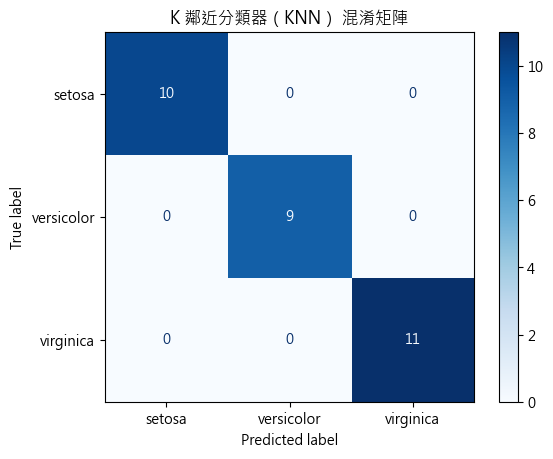

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 使用 K 鄰近分類器（KNN）
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)




# 評估函數
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} 的分類結果：")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} 混淆矩陣")
    #使用中文
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
    plt.show()

# 評估 KNN
evaluate_model(y_test, y_pred_knn, "K 鄰近分類器（KNN）")



X_train_2d shape: (120, 2)
y_train shape: (120,)


C:\Users\SHI\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


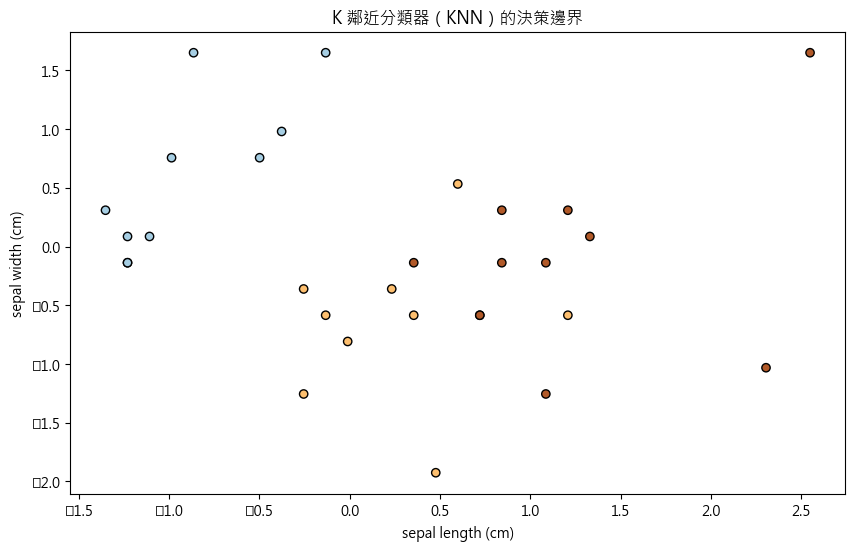

In [ ]:
import numpy as np
# 僅選擇兩個特徵進行可視化
X_train_2d = X_train[:, :2]  # 取訓練集的前兩個特徵
X_test_2d = X_test[:, :2]    # 取測試集的前兩個特徵

# 確保樣本數一致
print("X_train_2d shape:", X_train_2d.shape)  # 應顯示 (120, 2)
print("y_train shape:", y_train.shape)        # 應顯示 (120,)

# KNN 的決策邊界
knn.fit(X_train_2d, y_train)  # 使用正確的特徵進行訓練
xx, yy = np.meshgrid(
    np.linspace(X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1, 200),
    np.linspace(X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1, 200)
)
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

# 繪製決策邊界
plt.figure(figsize=(10, 6))
#plt.contourf(xx, yy, Z_knn, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)
plt.title("K 鄰近分類器（KNN）的決策邊界")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()



## 補充: 用現有的資料庫做做看吧

準確率: 1.00

分類報告:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\SHI\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


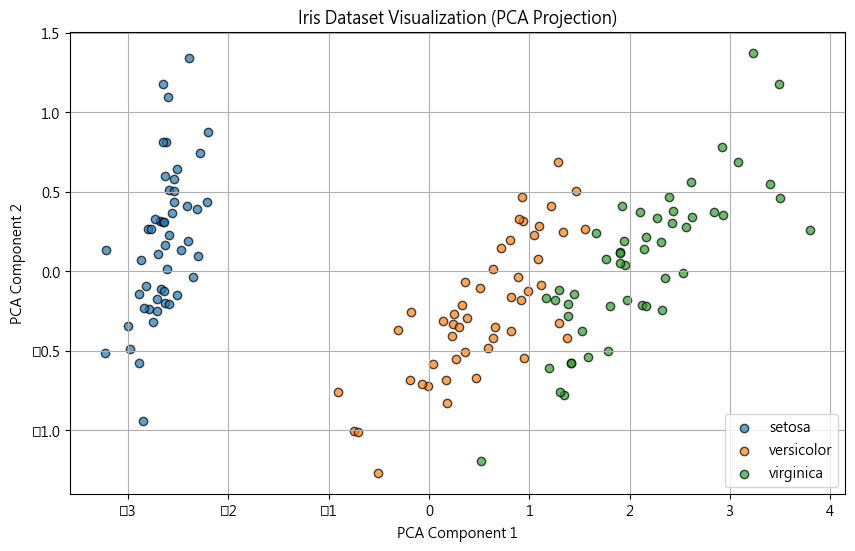

In [ ]:
# 載入所需套件
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# 1. 加載 Iris 資料集
iris = load_iris()
X, y = iris.data, iris.target

# 2. 將資料分為訓練集與測試集 (80% 訓練, 20% 測試)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 建立 KNN 模型 (K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 4. 預測測試集資料
y_pred = knn.predict(X_test)

# 5. 計算準確率與分類報告
accuracy = accuracy_score(y_test, y_pred)
print(f"準確率: {accuracy:.2f}")

classification_report_result = classification_report(y_test, y_pred)
print("\n分類報告:\n", classification_report_result)

# 6. 視覺化 - 使用 PCA 降維到 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 7. 視覺化資料分佈
plt.figure(figsize=(10, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1],
        label=target_name, alpha=0.7, edgecolors='k'
    )

plt.title("Iris Dataset Visualization (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()



In [ ]:
import numpy as np


### PCA(Principal Component Analysis)主成分分析
### **PCA 降維簡單解釋**

PCA (Principal Component Analysis，主成分分析) 是一種用於資料降維的技術，目的是在盡可能保留數據信息的情況下，將多維度數據轉換成較低維度的數據。

在 Iris 資料集中，PCA 可以將 **4 維特徵**（花萼長度、花萼寬度、花瓣長度、花瓣寬度）壓縮到 **2 維或 3 維**，方便我們進行視覺化，並觀察不同類別之間的分佈情況。

---

### **PCA 的主要步驟**

1. **標準化數據**：
   - 確保每個特徵的範圍一致（均值為 0，方差為 1），避免某些特徵對結果的影響過大。

2. **計算協方差矩陣**：
   - 協方差矩陣用於衡量特徵之間的相關性。

3. **特徵值與特徵向量分解**：
   - 計算協方差矩陣的特徵值與特徵向量。特徵值代表主成分的重要性，特徵向量則代表主成分的方向。

4. **選擇主要成分**：
   - 根據特徵值大小排序，選擇前幾個主要成分（如前 2 個主成分）。

5. **投影到低維空間**：
   - 將原始數據投影到選擇的主要成分上，形成降維後的數據。

---

### **使用 PCA 降 Iris 資料集維到 2 維**

以下是程式碼範例，展示如何用 PCA 將 Iris 資料從 4 維降到 2 維，並視覺化結果：

```python
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. 將數據降維到 2 維
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # X 是 Iris 的特徵數據

# 2. 繪製降維後的數據分佈
plt.figure(figsize=(10, 6))
colors = ['orange', 'blue', 'red']
for i, target_name in enumerate(iris.target_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1],
        color=colors[i], label=target_name, alpha=0.7, edgecolors='k'
    )

# 3. 設定圖表標題與座標
plt.title("Iris Dataset PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()
```

---

### **PCA 的優點**
1. **降低維度，減少計算成本**：在多特徵數據集中，降維能加速模型訓練。
2. **可視化高維數據**：能以圖形方式直觀呈現高維數據的分佈。
3. **去除冗餘特徵**：PCA 通過選取主要成分去掉不重要的特徵，提升分析效率。

---

### **在 Iris 資料集中的觀察**
1. 不同花種的數據點在 PCA 的 2D 空間中分佈明顯區分，特別是 Setosa 類別。
2. Versicolor 與 Virginica 可能會有部分重疊，表明它們的特徵差異較小。
